In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def gen_start_end(theta, psi):
    if type(theta) == np.float:
        if theta < 1.0:
            psis = 0.0
        else:
            psis = psi
    else:
        ind = np.where(theta < 1.0)
        psis = np.ones_like(theta) * psi
        psis[ind] = 0.0
    
    start_x, start_y = -np.cos(theta), -np.sin(theta)
    end_x = np.cos(theta) + np.cos(theta + psis)
    end_y = np.sin(theta) + np.sin(theta + psis)
    return start_x, start_y, end_x, end_y


In [3]:
theta = 1.1 #np.pi
psi = np.pi / 2
start_x, start_y, end_x, end_y = gen_start_end(theta, psi)

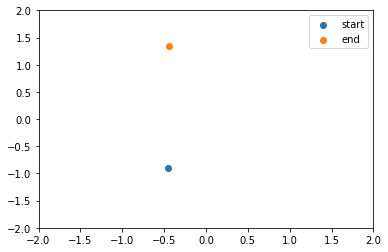

In [4]:
plt.scatter(start_x, start_y, label='start')
plt.scatter(end_x, end_y, label='end')
plt.xlim(-2, 2)
plt.ylim(-2,2)
plt.legend()

In [5]:
n_act = 1000
n_episodes = 100
psis = np.random.uniform(-np.pi / 2, np.pi / 2, n_episodes)

# offsets = np.zeros((n_episodes, n_act, 2))
offsets = np.random.uniform(low=-1,high=1,size=(n_act, 2))
X_all = np.zeros((n_episodes, n_act, 2))
Y_all = np.zeros((n_episodes, n_act, 2))
thetas_all = np.zeros((n_episodes, n_act))
thetas_rand = np.random.uniform(0, 2 * np.pi, n_act) 

for i, psi in enumerate(psis):
    thetas_all[i] = thetas_rand
    start_x, start_y, end_x, end_y = gen_start_end(thetas_all[i], psi)
    
    X_all[i] = np.stack([start_x, start_y], axis=1) + offsets
    Y_all[i] = np.stack([end_x, end_y], axis=1) + offsets


3.917825952502206
4.958553839115004
3.2154891645885133
4.209747066101823
5.868529247852777


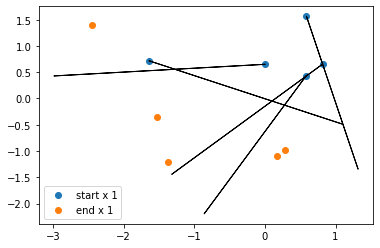

In [10]:
idx = 8
up_to_idx = 5
scale = 3.0
plt.scatter(X_all[idx, :up_to_idx, 0], X_all[idx, :up_to_idx, 1], label='start x 1')
plt.scatter(Y_all[idx, :up_to_idx, 0], Y_all[idx, :up_to_idx, 1], label='end x 1')
for i in range(up_to_idx):
    vx, vy = np.cos(thetas_all[idx, i]), np.sin(thetas_all[idx, i])
    plt.arrow(X_all[idx, i, 0], X_all[idx, i, 1], vx*scale, vy*scale)
    print(thetas_all[idx, i])
# plt.scatter(Y_all[2, :, 0], Y_all[2, :, 1], label='end x 2')
plt.legend()


3.279581651635996
2.8332549886347507
1.898357329285581
3.626211578497297
1.0883585738013624


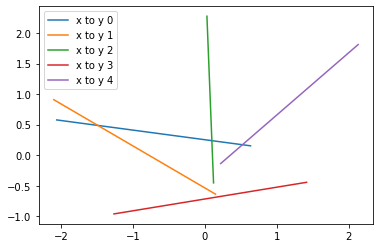

In [7]:
for i in range(up_to_idx):
    plt.plot([X_all[idx, i, 0], Y_all[idx, i, 0]], [X_all[idx, i, 1], Y_all[idx, i, 1]], label='x to y {}'.format(i))
    print(thetas_all[idx, i])
plt.legend()


In [8]:
data = dict(X=X_all, Y=Y_all, thetas=thetas_all, psi=psis)
# with open('/data/varyingsim/datasets/toy_3_split_test.pickle', 'wb') as f:
with open('/data/varyingsim/datasets/toy_3_split.pickle', 'wb') as f:
    pickle.dump(data, f)

In [9]:
psis[1]

-1.2829093317480373

In [10]:
episode_idx = 0
run_idx = 0
x, theta, psi = X_all[episode_idx][run_idx], thetas_all[episode_idx][run_idx], psis[episode_idx]

In [11]:
x, theta

(array([-0.58931718,  0.21145514]), 0.4022124200033242)

(1000, 2)